In [11]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install adjustText
from adjustText import adjust_text
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
df = '/content/drive/MyDrive/Big-Data/Crimenes.csv'
df_crimenes = pd.read_csv(df)

# Laboratorio III: Clasificador zonas según el peligro

Introducción del laboratorio:

Se debe desarrollar un programa que permita clasificar los estados en diferentes categorías, diviéndolos en zonas de baja peligrosidad y alta peligrosidad.

Integrantes del grupo 35:

* Lautaro Scholles
* Noelia Pintos
* Facundo Romo

### Selección de características

Visualizamos y seleccionamos aquellas características que sean más relevantes para posteriormente normalizar los datos. Para este caso, nos vamos a enfocar más en las siguientes cuatro características: 'Asesinatos', 'Asaltos', 'Poblacion Urbana' y 'Violaciones'.

In [14]:
df_crimenes.head()

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [15]:
caracteristicas = df_crimenes[['Asesinatos', 'Asaltos', 'Poblacion Urbana', 'Violaciones']]

### Normalización de datos

Procedemos con la normalización de datos utilizando **StandardScaler** de la librería de *sklearn*. Este es un paso importante en el contexto de algoritmos de clusterización, como el Kmeans. Por ende, lo incluímos como un paso preliminar antes de abordar la determinación del número óptimo de clusters.

In [16]:
from sklearn.preprocessing import StandardScaler

# Procedemos con la normalización de datos
scaler = StandardScaler()
c_scaled = scaler.fit_transform(caracteristicas)

Antes de aplicar K-Means, utilizamos el método del codo (Elbow Method) para hayar el k óptimo.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

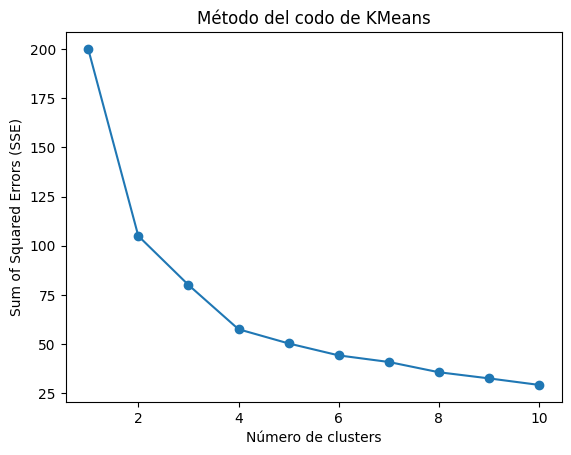

In [17]:
import matplotlib.pyplot as plt

# Selección del k óptimo usando el método del codo
sse = [] # Sum of squared errors (SSE)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42) # Vamos cargando el k en el algoritmo k-means
    kmeans.fit(c_scaled)
    sse.append(kmeans.inertia_)

# Gráfica del método del codo para K-means
plt.plot(range(1, 11), sse, marker='o')
plt.title('Método del codo de KMeans')
plt.xlabel('Número de clusters')
plt.ylabel('Sum of Squared Errors (SSE)') # Inercia
plt.show()

En la figura anterior, se puede observar que el clúster 1 tiene una inercia muy alta y que a medida que avanzamos hacia el **clúster 4** no hay tanta inercia, por lo tanto, este último valor es con el cual vamos a trabajar.

###Aplicacion del K optimo

In [24]:
# Aplicamos K-Means con el número óptimo de clusters
k_optimo = 4
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
kmeans.fit(c_scaled)

# Obtenemos las etiquetas de los clusters y las añadimos a nuestro dataframe
df_crimenes['Cluster'] = kmeans.labels_

# Definimos las descripciones de los clusters
descripciones_clusters = {
    0: 'Baja peligrosidad',
    1: 'Media peligrosidad',
    2: 'Alta peligrosidad',
    3: 'Muy alta peligrosidad'
}

# Reemplazamos las etiquetas numéricas de los clusters por las descripciones
df_crimenes['Cluster'] = df_crimenes['Cluster'].replace(descripciones_clusters)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


###Calculo de la matriz correlacion

####Realizamos la matriz para saber que parametros son lo que mas estan relacionados entre si, para poder analizarlos mejor

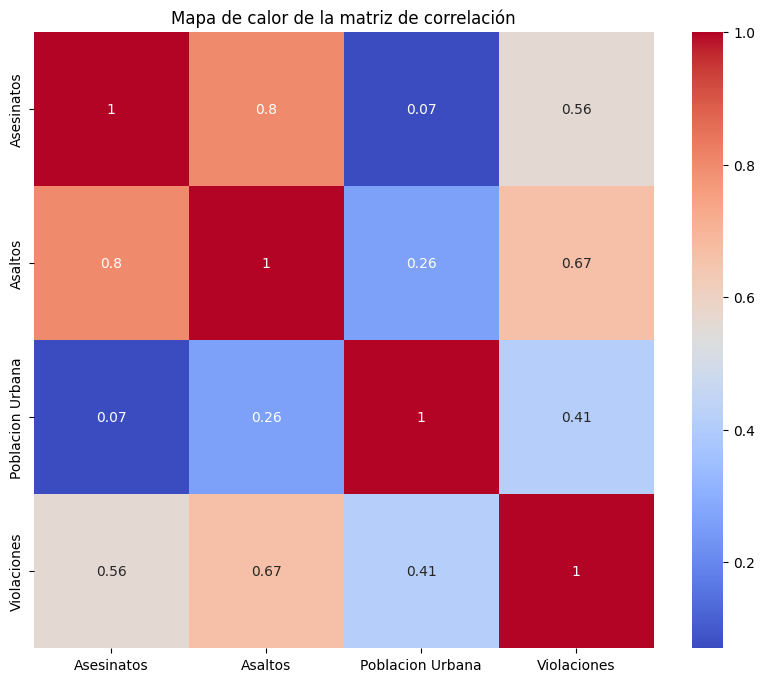

In [25]:
# Calculamos la matriz de correlación
corr = df_crimenes[['Asesinatos', 'Asaltos', 'Poblacion Urbana', 'Violaciones']].corr()

# Creamos el mapa de calor
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de la matriz de correlación')
plt.show()

####Vemos que los asaltos como los asesinatos tienen una fuerte relacion entre ambos crimenes, procemos a graficarlo para verlo mejor

####Asaltos y asesinatos

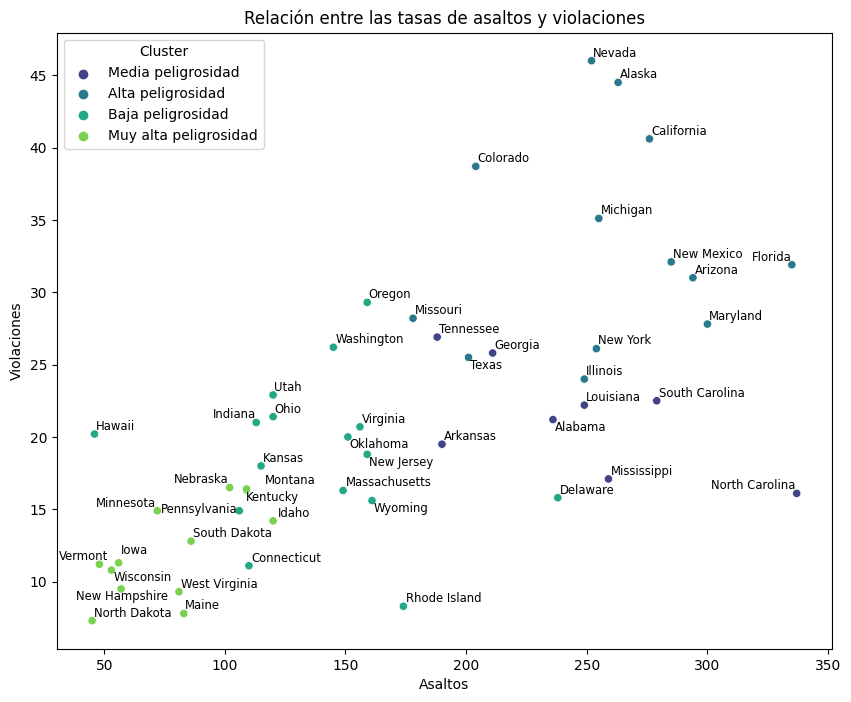

In [29]:
plt.figure(figsize=(10,8))
plot = sns.scatterplot(data=df_crimenes, x='Asaltos', y='Violaciones', hue='Cluster', palette='viridis')

# Añadimos los nombres de los estados a los puntos
texts = []
for line in range(0, df_crimenes.shape[0]):
     texts.append(plot.text(df_crimenes.Asaltos[line]+0.2, df_crimenes.Violaciones[line], df_crimenes.Estado[line], horizontalalignment='left', size='small', color='black'))

# Ajustamos las etiquetas de texto para minimizar la superposición
adjust_text(texts)

plt.title('Relación entre las tasas de asaltos y violaciones')
plt.show()

####Vemos que los crimenes de asalto y violaciones tambien tiene una fuerte relacion aunque menor que la anterior, procemos a graficarla

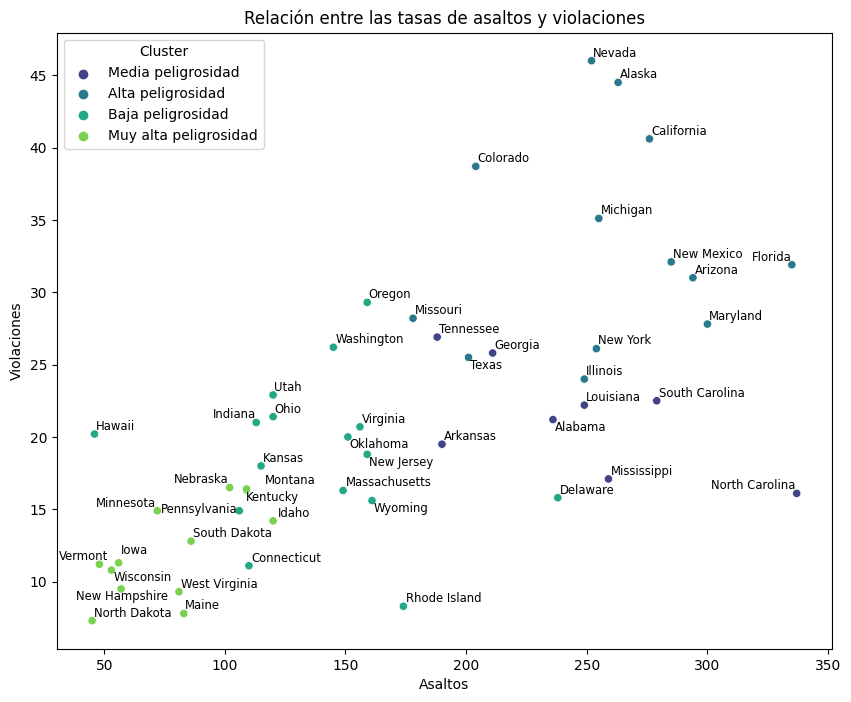

In [32]:
# Creamos el gráfico de dispersión donde se relaciona los asesinatos y los asaltos
plt.figure(figsize=(10,8))
plot = sns.scatterplot(data=df_crimenes, x='Asaltos', y='Violaciones', hue='Cluster', palette='viridis')

# Añadimos los nombres de los estados a los puntos
texts = []
for line in range(0, df_crimenes.shape[0]):
     texts.append(plot.text(df_crimenes.Asaltos[line]+0.2, df_crimenes.Violaciones[line], df_crimenes.Estado[line], horizontalalignment='left', size='small', color='black'))

# Ajustamos las etiquetas de texto para minimizar la superposición
adjust_text(texts)

plt.title('Relación entre las tasas de asaltos y violaciones')
plt.show()




###Criminalidad

####Por ultimo analizamos las tasa de criminalidad para cada estado, vemos cuales son los 5 con la tasa mas alta y vemos cual es el estado mas peligroso, basandonos en crimenes cada 100mil habitantes

In [22]:
# Sumamos las tasas de crímenes para cada estado
df_crimenes['Total Crimenes'] = df_crimenes['Asesinatos'] + df_crimenes['Asaltos'] + df_crimenes['Violaciones']

# Ordenamos los estados de acuerdo a la suma total de crímenes
df_crimenes_sorted = df_crimenes.sort_values('Total Crimenes', ascending=False)

# Mostramos los primeros 5 estados con la mayor cantidad de crímenes
print(df_crimenes_sorted[['Estado', 'Total Crimenes']].head())

# Obtenemos el estado con la mayor tasa de criminalidad
estado_max_crimen = df_crimenes_sorted['Estado'].iloc[0]
max_crimen = df_crimenes_sorted['Total Crimenes'].iloc[0]

print(f"El estado con la mayor tasa de criminalidad es {estado_max_crimen} con un total de {max_crimen}.")

            Estado  Total Crimenes
8          Florida           382.3
32  North Carolina           366.1
19        Maryland           339.1
2          Arizona           333.1
30      New Mexico           328.5
El estado con la mayor tasa de criminalidad es Florida con un total de 382.29999999999995.


In [23]:
#crimenes cada 100mil habitantes
df_crimenes['Tasa Crimenes'] = df_crimenes['Total Crimenes'] / df_crimenes['Poblacion Urbana'] * 100000

# Ordenamos los estados de acuerdo a la tasa de crímenes
df_crimenes_sorted = df_crimenes.sort_values('Tasa Crimenes', ascending=False)

# Obtenemos el estado con la mayor tasa de criminalidad
estado_max_crimen = df_crimenes_sorted['Estado'].iloc[0]
max_crimen = df_crimenes_sorted['Tasa Crimenes'].iloc[0]

print(f"El estado con la mayor tasa de criminalidad es {estado_max_crimen} con una tasa de {max_crimen} crímenes por cada 100,000 habitantes.")

El estado con la mayor tasa de criminalidad es North Carolina con una tasa de 813555.5555555555 crímenes por cada 100,000 habitantes.
